# Your title for your regression project

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com). 

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- `logerror` - Difference between zest and sold price
- `bathroomcnt` - # of bathrooms (half included)
- `bedroomcnt` - # of bedrooms
- `calculatedfinishedsquarefeet` - finished sqft
- `fullbathcnt` - # of full baths
- `garagecarcnt` - # of car garg
- `roomcnt` - # of rooms
- `yearbuilt` - construction year
- `taxvaluedollarcnt` - assessed value
- `taxamount` - anual tax payment


### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

- I think bed/bath, sqft, year, and tax assessment will be big factors in the logerror
- can combine tax and sqft to get price per sqft

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")




### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

- Filter out any from predictions_2016 that do not have a logerror. 
- Generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`
- (optional) `regionidzip`

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 


#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

In [2]:
# Reading in both csv

zil_prop = pd.read_csv('properties_2016.csv')
zil_train = pd.read_csv('train_2016_v2.csv')

In [3]:
zil_prop.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
zil_train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
# Merging the 2 into 1

zil_full = zil_prop.merge(zil_train, on=['parcelid'])
zil_full.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [6]:
zil_full.shape

(90275, 60)

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

In [7]:
# Getting just the vars I want to start with.

zil_df = zil_full[['logerror',
                'bathroomcnt',
                'bedroomcnt',
                'calculatedfinishedsquarefeet',
                'fullbathcnt',
                'garagecarcnt',
                'roomcnt',
                'yearbuilt',
                'taxvaluedollarcnt',
                'taxamount',
                'landtaxvaluedollarcnt']]

In [8]:
# Duplicate parcel id but different transactions, dont drop.

zil_full = zil_prop.merge(zil_train, on=['parcelid'])
zil_full[['parcelid','transactiondate']][zil_full.duplicated('parcelid', False)].sort_values('parcelid').head()

,parcelid,transactiondate
52333,10736972,2016-02-22
52334,10736972,2016-12-14
68065,10790468,2016-02-12
68066,10790468,2016-09-13
80309,10796614,2016-06-14


#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [9]:
colnames = list(zil_df.columns.values)

colnames

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'garagecarcnt',
 'roomcnt',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount',
 'landtaxvaluedollarcnt']

#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

In [10]:
zil_df.dtypes

logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
landtaxvaluedollarcnt           float64
dtype: object

#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

In [11]:
zil_df.isnull().sum()

logerror                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      661
fullbathcnt                      1182
garagecarcnt                    60338
roomcnt                             0
yearbuilt                         756
taxvaluedollarcnt                   1
taxamount                           6
landtaxvaluedollarcnt               1
dtype: int64

In [12]:
# Too many missing in garagecarcnt, dropping column
# fullbathcnt similar to bathroomcnt but need the half bath info, dropping column.
# Roomcnt seems useless, dropping.

zil_trimmed = zil_df.drop(columns=['fullbathcnt', 'garagecarcnt', 'roomcnt'])
zil_trimmed.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt
0,0.0953,2.5,3.0,1264.0,1986.0,191811.0,2015.06,76724.0
1,0.0198,1.0,2.0,777.0,1990.0,239679.0,2581.30,95870.0
2,0.0060,2.0,3.0,1101.0,1956.0,47853.0,591.64,14234.0
3,-0.0566,1.5,2.0,1554.0,1965.0,62914.0,682.78,17305.0
4,0.0573,2.5,4.0,2415.0,1984.0,554000.0,5886.92,277000.0


In [13]:
# A few missing square feet, dropping the rows.

zil_trimmed = zil_trimmed.dropna(how='any', subset=['calculatedfinishedsquarefeet'])

In [14]:
zil_trimmed.sort_values('yearbuilt').tail()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt
86423,0.0344,4.0,8.0,3192.0,NaN,270905.0,6634.59,122915.0
87752,0.6233,3.0,3.0,2025.0,NaN,469190.0,5822.71,326393.0
88089,-0.0192,1.0,2.0,1152.0,NaN,235909.0,3305.07,120188.0
88334,0.1856,0.0,0.0,1416.0,NaN,36452.0,864.04,22681.0
89062,0.0000,0.0,0.0,3764.0,NaN,695876.0,8766.60,463920.0


In [15]:
# Filling in the other NA values with the mean of their column

zil_trimmed = zil_trimmed.fillna(zil_trimmed.mean())
zil_trimmed.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt
0,0.0953,2.5,3.0,1264.0,1986.0,191811.0,2015.06,76724.0
1,0.0198,1.0,2.0,777.0,1990.0,239679.0,2581.30,95870.0
2,0.0060,2.0,3.0,1101.0,1956.0,47853.0,591.64,14234.0
3,-0.0566,1.5,2.0,1554.0,1965.0,62914.0,682.78,17305.0
4,0.0573,2.5,4.0,2415.0,1984.0,554000.0,5886.92,277000.0


In [16]:
# Setting a new df for my working one that is ready to go

df_zillow = zil_trimmed

In [17]:
df_zillow.isnull().sum()

logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
landtaxvaluedollarcnt           0
dtype: int64

In [18]:
df_zillow.describe()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt
count,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,8.961400e+04,89614.000000,8.961400e+04
mean,0.011558,2.296114,3.054009,1773.185987,1968.531752,4.577683e+05,5974.879994,2.783299e+05
std,0.159826,0.988833,1.131242,928.162393,23.748451,5.532027e+05,6800.820139,3.998701e+05
min,-4.605000,0.000000,0.000000,2.000000,1885.000000,2.200000e+01,49.080000,2.200000e+01
25%,-0.025300,2.000000,2.000000,1184.000000,1953.000000,2.001525e+05,2879.727500,8.243225e+04
50%,0.006000,2.000000,3.000000,1540.000000,1970.000000,3.436775e+05,4545.950000,1.935100e+05
75%,0.039200,3.000000,4.000000,2095.000000,1987.000000,5.409985e+05,6897.575000,3.459612e+05
max,4.737000,20.000000,16.000000,22741.000000,2015.000000,2.775000e+07,321936.090000,2.450000e+07


#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [19]:
x_vars = df_zillow.drop(columns='logerror')
x_vars = list(x_vars.columns.values)
x_vars


['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount',
 'landtaxvaluedollarcnt']

#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

In [20]:
y_var = df_zillow[['logerror']]
y_var = list(y_var.columns.values)
y_var


['logerror']

In [21]:
df_zillow.shape

(89614, 8)

In [22]:
# Price per SQFT

tax_per_sqft = df_zillow.taxamount / df_zillow.calculatedfinishedsquarefeet
tax_per_sqft_df = pd.DataFrame(tax_per_sqft)
tax_per_sqft_df = tax_per_sqft_df.rename(columns={0: 'tax_per_sqft'})
df_zillow = df_zillow.join(tax_per_sqft_df)


In [23]:
# creating a log version of taxamount

log_taxamount = np.log(df_zillow.taxamount)
log_taxamount_df = pd.DataFrame(log_taxamount)
log_taxamount_df = log_taxamount_df.rename(columns={'taxamount': 'log_taxamount'})
df_zillow = df_zillow.join(log_taxamount_df)

In [24]:
# creating a log version of sqft

log_sqft = np.log(df_zillow.calculatedfinishedsquarefeet)
log_sqft_df = pd.DataFrame(log_sqft)
log_sqft_df = log_sqft_df.rename(columns={'calculatedfinishedsquarefeet': 'log_sqft'})
df_zillow = df_zillow.join(log_sqft_df)

In [25]:
# creating a log version, feature eng (combining sqft and tax amnt)

log_price_sqft = df_zillow.log_taxamount / df_zillow.log_sqft
log_price_sqft_df = pd.DataFrame(log_price_sqft)
log_price_sqft_df = log_price_sqft_df.rename(columns={0: 'log_price_sqft'})
df_zillow = df_zillow.join(log_price_sqft_df)

In [26]:
# creating a log version of tax dollar cnt

log_taxvaluedollarcnt = np.log(df_zillow.taxvaluedollarcnt)
log_taxvaluedollarcnt_df = pd.DataFrame(log_taxvaluedollarcnt)
log_taxvaluedollarcnt_df = log_taxvaluedollarcnt_df.rename(columns={'taxvaluedollarcnt': 'log_taxvaluedollarcnt'})
df_zillow = df_zillow.join(log_taxvaluedollarcnt_df)



In [27]:
# creating a log version of land tax value

log_landtaxvaluedollarcnt = np.log(df_zillow.landtaxvaluedollarcnt)
log_landtaxvaluedollarcnt_df = pd.DataFrame(log_landtaxvaluedollarcnt)
log_landtaxvaluedollarcnt_df = log_landtaxvaluedollarcnt_df.rename(columns={'landtaxvaluedollarcnt': 'log_landtaxvaluedollarcnt'})
df_zillow = df_zillow.join(log_landtaxvaluedollarcnt_df)



In [28]:
# combining bedroom and bathroom

df_zillow['bednbath'] = df_zillow.bedroomcnt + df_zillow.bathroomcnt

In [29]:
df_zillow['age'] = 2019 - df_zillow.yearbuilt

In [30]:
# abs value for logerror

df_zillow['abs_logerror'] = df_zillow.logerror.abs()

In [31]:
# DF has both log and non-log versions now

df_zillow.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt,tax_per_sqft,log_taxamount,log_sqft,log_price_sqft,log_taxvaluedollarcnt,log_landtaxvaluedollarcnt,bednbath,age,abs_logerror
0,0.0953,2.5,3.0,1264.0,1986.0,191811.0,2015.06,76724.0,1.594193,7.608404,7.142037,1.065299,12.164266,11.247970,5.5,33.0,0.0953
1,0.0198,1.0,2.0,777.0,1990.0,239679.0,2581.30,95870.0,3.322136,7.856048,6.655440,1.180395,12.387056,11.470748,3.0,29.0,0.0198
2,0.0060,2.0,3.0,1101.0,1956.0,47853.0,591.64,14234.0,0.537366,6.382898,7.003974,0.911325,10.775889,9.563389,5.0,63.0,0.0060
3,-0.0566,1.5,2.0,1554.0,1965.0,62914.0,682.78,17305.0,0.439369,6.526173,7.348588,0.888085,11.049524,9.758751,3.5,54.0,0.0566
4,0.0573,2.5,4.0,2415.0,1984.0,554000.0,5886.92,277000.0,2.437648,8.680488,7.789455,1.114390,13.224920,12.531773,6.5,35.0,0.0573


In [32]:
# Dropping the non-log and ones used in feature eng  to have working ones.

df_zillow = df_zillow.drop(['taxamount', 
                            'calculatedfinishedsquarefeet',
                            'tax_per_sqft',
                            'taxvaluedollarcnt',
                            'landtaxvaluedollarcnt',
                            'bathroomcnt',
                            'bedroomcnt',
                            'yearbuilt',
                            'log_taxamount',
                            'log_sqft'], axis=1)



In [33]:
df_zillow.head()

,logerror,log_price_sqft,log_taxvaluedollarcnt,log_landtaxvaluedollarcnt,bednbath,age,abs_logerror
0,0.0953,1.065299,12.164266,11.247970,5.5,33.0,0.0953
1,0.0198,1.180395,12.387056,11.470748,3.0,29.0,0.0198
2,0.0060,0.911325,10.775889,9.563389,5.0,63.0,0.0060
3,-0.0566,0.888085,11.049524,9.758751,3.5,54.0,0.0566
4,0.0573,1.114390,13.224920,12.531773,6.5,35.0,0.0573


In [34]:
# redoing colnames with log_names

colnames = list(df_zillow.columns.values)
colnames

['logerror',
 'log_price_sqft',
 'log_taxvaluedollarcnt',
 'log_landtaxvaluedollarcnt',
 'bednbath',
 'age',
 'abs_logerror']

In [35]:
# Resetting x_vars for the log_names

x_vars = df_zillow.drop(['logerror', 'abs_logerror'], axis=1)
x_vars = list(x_vars.columns.values)
x_vars


['log_price_sqft',
 'log_taxvaluedollarcnt',
 'log_landtaxvaluedollarcnt',
 'bednbath',
 'age']

In [36]:
df_zillow.shape

(89614, 7)

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

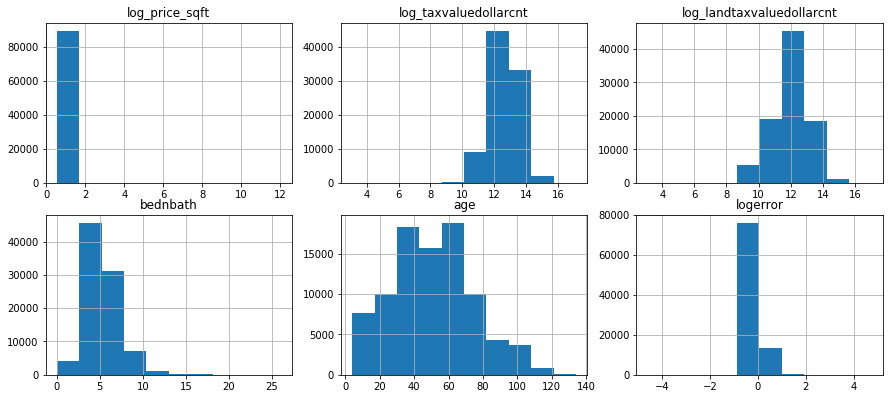

In [37]:
# With a lot of outliers

plt.figure(figsize=(15,10))


for i, col in enumerate(x_vars + y_var):
    plot_number = i + 1
    series = df_zillow[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

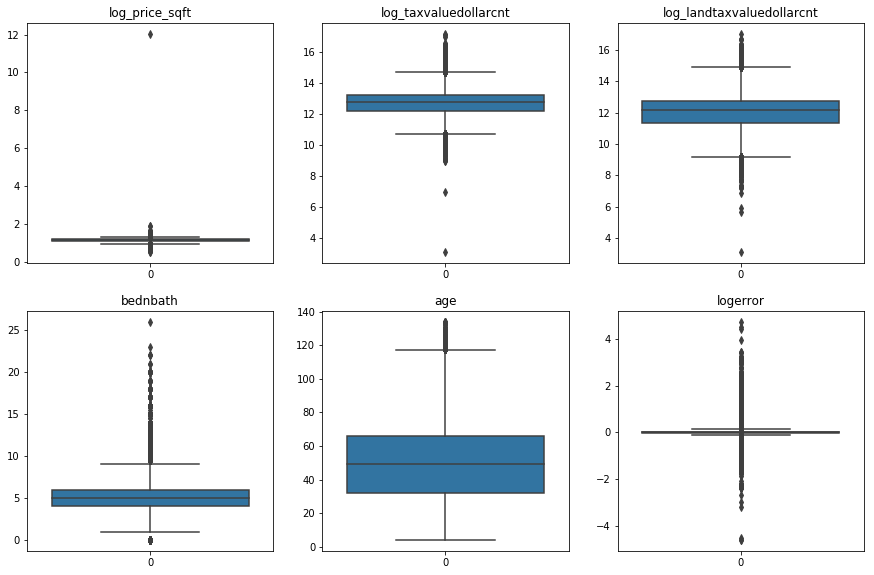

In [38]:
# With a lot of outliers


plt.figure(figsize=(15, 15))


for i, col in enumerate(x_vars + y_var):
    plot_number = i + 1
    series = df_zillow[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.boxplot(data=series)

In [39]:
# Lets take a look at data

df_zillow.describe()

,logerror,log_price_sqft,log_taxvaluedollarcnt,log_landtaxvaluedollarcnt,bednbath,age,abs_logerror
count,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000
mean,0.011558,1.139011,12.675069,11.996436,5.350124,50.468248,0.067967
std,0.159826,0.095425,0.852783,1.100586,1.915166,23.748451,0.145115
min,-4.605000,0.528903,3.091042,3.091042,0.000000,4.000000,0.000000
25%,-0.025300,1.092362,12.206835,11.319732,4.000000,32.000000,0.013900
50%,0.006000,1.148787,12.747459,12.173084,5.000000,49.000000,0.032500
75%,0.039200,1.195065,13.201172,12.754082,6.000000,66.000000,0.069400
max,4.737000,12.023623,17.138746,17.014184,26.000000,134.000000,4.737000


In [40]:
# removing all extra large homes more than 11 bednbath, outliers 

df_zillow.drop(df_zillow.loc[df_zillow['bednbath']>10].index, inplace=True)


In [41]:
df_zillow.drop(df_zillow.loc[df_zillow['bednbath']==0].index, inplace=True)


In [42]:
# Trying newer houses only

df_zillow.drop(df_zillow.loc[df_zillow['age']>50].index, inplace=True)


In [43]:
df_zillow[['log_landtaxvaluedollarcnt']].sort_values('log_landtaxvaluedollarcnt').head()
df_zillow.drop(index=14427, inplace=True)

In [78]:
# Huge outlier for price per sqft

df_zillow[['log_price_sqft']].sort_values('log_price_sqft').tail()
df_zillow.drop(index=81433, inplace=True)

In [79]:
# This one gives me problems sometimes with 0/0
# df_zillow = df_zillow.drop(81433)

In [116]:
df_zillow.shape

(45030, 7)

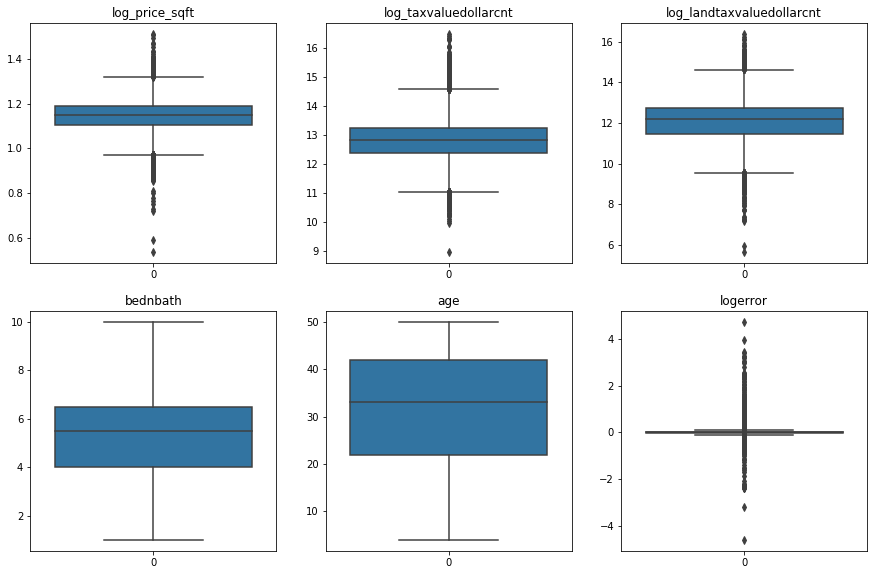

In [81]:
# Took out the houses with outliers in bedroom and bathroom count.

plt.figure(figsize=(15, 15))


for i, col in enumerate(x_vars + y_var):
    plot_number = i + 1
    series = df_zillow[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.boxplot(data=series)

#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

In [82]:
# Applying MinMax scale

data = df_zillow
scaler = MinMaxScaler()
scaler.fit(data)
zil_xform = scaler.transform(data)
zil_xform_df = pd.DataFrame(zil_xform)
zil_xform_df.head()

,0,1,2,3,4,5,6
0,0.503136,0.542840,0.425050,0.522330,0.500000,0.630435,0.020118
1,0.495055,0.660832,0.454664,0.543034,0.222222,0.543478,0.004180
2,0.499069,0.593166,0.566038,0.641641,0.611111,0.673913,0.012096
3,0.498972,0.485715,0.479818,0.510480,0.611111,0.760870,0.011906
4,0.496307,0.634389,0.559144,0.660959,0.444444,0.804348,0.006650


In [83]:
# Relabel

zil_xform_df= zil_xform_df.rename(columns={0: 'logerror',
                                           1: 'log_price_sqft',
                                           2: 'log_taxvaluedollarcnt',
                                           3: 'log_landtaxvaluedollarcnt',
                                           4: 'bednbath',
                                           5: 'age',
                                           6: 'abs_logerror'})
                         
zil_xform_df.head()

,logerror,log_price_sqft,log_taxvaluedollarcnt,log_landtaxvaluedollarcnt,bednbath,age,abs_logerror
0,0.503136,0.542840,0.425050,0.522330,0.500000,0.630435,0.020118
1,0.495055,0.660832,0.454664,0.543034,0.222222,0.543478,0.004180
2,0.499069,0.593166,0.566038,0.641641,0.611111,0.673913,0.012096
3,0.498972,0.485715,0.479818,0.510480,0.611111,0.760870,0.011906
4,0.496307,0.634389,0.559144,0.660959,0.444444,0.804348,0.006650


### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

In [84]:
# Split the unscalled data

X = df_zillow[x_vars]
y = df_zillow[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [85]:
# Split the scalled data

X_xform = zil_xform_df[x_vars]
y_xform = zil_xform_df[y_var]

X_train_xform, X_test_xform, y_train_xform, y_test_xform = train_test_split(X_xform, y_xform, train_size=.7, random_state=0)

train_xform = pd.concat([X_train_xform, y_train_xform], axis=1)
test_xform = pd.concat([X_test_xform, y_test_xform], axis=1)

#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

In [86]:
for i, col in enumerate(colnames):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = df_zillow[col]
        j = sns.jointplot(series, 'abs_logerror', data=df_zillow, kind='reg', height=5)
        j.annotate(stats.pearsonr)

In [87]:
for i, col in enumerate(colnames):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = zil_xform_df[col]
        j = sns.jointplot(series, 'abs_logerror', data=zil_xform_df, kind='reg', height=5)
        j.annotate(stats.pearsonr)

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

In [88]:
# g = sns.PairGrid(train)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)

In [89]:
g = sns.PairGrid(train_xform)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Create a heatmap of the correlation between each variable pair.

In [90]:
# plt.figure(figsize=(10, 10))


# sns.heatmap(train.corr(), cmap='Greens', annot=True)


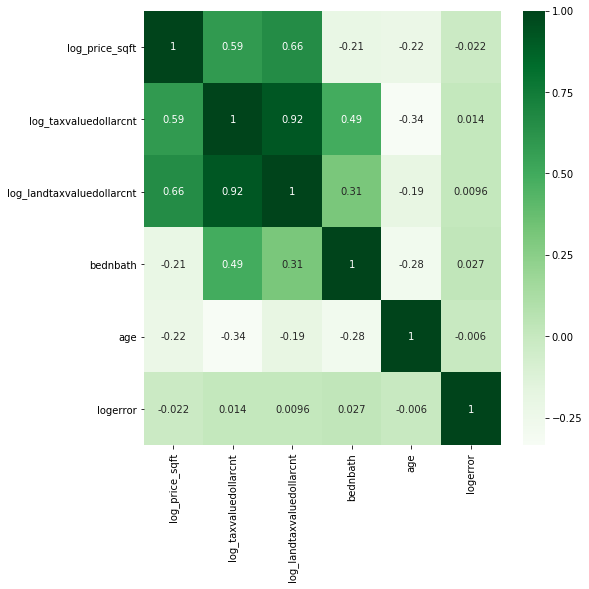

In [91]:
plt.figure(figsize=(8, 8))


sns.heatmap(train_xform.corr(), cmap='Greens', annot=True)

#### Summarize your conclusions from all of these steps.  

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [92]:
bed3 = train[train.bednbath == 3].logerror
bed5 = train[train.bednbath >= 5].logerror

stats.ttest_ind(bed3, bed5)

Ttest_indResult(statistic=-1.2695105630693142, pvalue=0.2042718281876132)

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [93]:
# sqft

mean_sqft = train.log_price_sqft.mean()
small_sqft = train[train.log_price_sqft < mean_sqft].logerror
large_sqft = train[train.log_price_sqft > mean_sqft].logerror

stats.ttest_ind(small_sqft, large_sqft)


Ttest_indResult(statistic=3.2561829232185464, pvalue=0.001130402024274286)

In [94]:
# Age, old is 50+

new = train[train.age < 50].logerror
old = train[train.age >= 50].logerror

stats.ttest_ind(new, old)


Ttest_indResult(statistic=-0.04617565479626959, pvalue=0.9631705389764487)

### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)

#### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  

#### Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [95]:
colnames

['logerror',
 'log_price_sqft',
 'log_taxvaluedollarcnt',
 'log_landtaxvaluedollarcnt',
 'bednbath',
 'age',
 'abs_logerror']

In [96]:
# Are there new features you could create based on existing features that might be helpful?
# Come up with at least one possible new feature that is a calculation from 2+ existing variables.

# assessed value per sqft

# tax_per_sqft = train.log_sqft / train.log_sqft


In [97]:
# Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target
#  Non-standardized

ols_model_1 = sm.OLS(y_train, X_train)
fit = ols_model_1.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     60.27
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           1.03e-62
Time:                        23:34:40   Log-Likelihood:                 18663.
No. Observations:               31520   AIC:                        -3.732e+04
Df Residuals:                   31515   BIC:                        -3.727e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_price_sqft               -0.0948      0.019     -5.086      0.000      -0.131      -0.058
log_taxvaluedollarcnt         0.0092      0.003      3.649      0.000       0.004       0.014
log_landtaxvaluedollarcnt     0.0005      0.002      0.311      0.756      -0.003       0.004
bednbath                     -0.0006      0.001     -0.791      0.429      -0.002       0.001
age                        -1.15e-05   6.22e-05     -0.185      0.853      -0.000       0.000
==============================================================================
Omnibus:                    19775.581   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         56170100.873
Skew:                           1.366   Prob(JB):                         0.00
Kurtosis:                     209.789   Cond. No.                         944.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# OLS with min-max stand, all x_vars

ols_model_2 = sm.OLS(y_train_xform, X_train_xform)
fit = ols_model_2.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 8.874e+05
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:34:40   Log-Likelihood:                 55558.
No. Observations:               31520   AIC:                        -1.111e+05
Df Residuals:                   31515   BIC:                        -1.111e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_price_sqft                0.7731      0.004    216.747      0.000       0.766       0.780
log_taxvaluedollarcnt        -0.3777      0.008    -45.989      0.000      -0.394      -0.362
log_landtaxvaluedollarcnt     0.0812      0.008     10.818      0.000       0.066       0.096
bednbath                      0.2184      0.002    130.903      0.000       0.215       0.222
age                           0.0755      0.001     81.794      0.000       0.074       0.077
==============================================================================
Omnibus:                     2733.155   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17380.823
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                       6.629   Cond. No.                         58.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Dropping $/sqft

ols_model_3 = sm.OLS(y_train_xform, X_train_xform.drop('log_price_sqft', axis=1))
fit = ols_model_3.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.407e+05
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:34:40   Log-Likelihood:                 41176.
No. Observations:               31520   AIC:                        -8.234e+04
Df Residuals:                   31516   BIC:                        -8.231e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_taxvaluedollarcnt        -0.1444      0.013    -11.235      0.000      -0.170      -0.119
log_landtaxvaluedollarcnt     0.7342      0.011     67.723      0.000       0.713       0.755
bednbath                      0.0951      0.002     38.432      0.000       0.090       0.100
age                           0.1242      0.001     87.890      0.000       0.121       0.127
==============================================================================
Omnibus:                      408.187   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.253
Skew:                           0.149   Prob(JB):                    1.01e-131
Kurtosis:                       3.609   Cond. No.                         50.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Summarize your conclusions and next steps from your analysis in above.
# What will you try when developing your model? (which features to use/not use/etc)



In [101]:
lm1 = LinearRegression()

lm1.fit(X_train_xform, y_train_xform)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)



[0.4973474]
[[-0.01088437  0.00392352  0.00348603 -0.00042917 -0.00035036]]


In [102]:
y_pred_lm1 = lm1.predict(X_train_xform)
y_pred_lm1

array([[0.49476391],
       [0.49385486],
       [0.49293529],
       ...,
       [0.49401307],
       [0.49458239],
       [0.49428893]])

In [103]:
r2_lm1 = r2_score(y_train_xform, y_pred_lm1)
print('r^2: {:.2%}'.format(r2_lm1))

mse_lm1 = mean_squared_error(y_train_xform, y_pred_lm1)
print("mse: {:.3}".format(mse_lm1)) 

mae_lm1 = median_absolute_error(y_train_xform, y_pred_lm1)
print("mae: {:.3}".format(mae_lm1)) 


r^2: 0.16%
mse: 0.000205
mae: 0.00296


In [104]:
y_pred_lm1_test = lm1.predict(X_test_xform)
y_pred_lm1_test


array([[0.49428607],
       [0.49451228],
       [0.49453684],
       ...,
       [0.49397931],
       [0.49357286],
       [0.49360028]])

In [105]:

r2_lm1_test = r2_score(y_test_xform, y_pred_lm1_test)
print('r^2: {:.2%}'.format(r2_lm1_test))

mse_lm1_test = mean_squared_error(y_test_xform, y_pred_lm1_test)
print("mse: {:.3}".format(mse_lm1_test)) 

mae_lm1_test = median_absolute_error(y_test_xform, y_pred_lm1_test)
print("mae: {:.3}".format(mae_lm1_test)) 


r^2: 0.23%
mse: 0.000258
mae: 0.00289


Text(0, 0.5, 'Residuals')

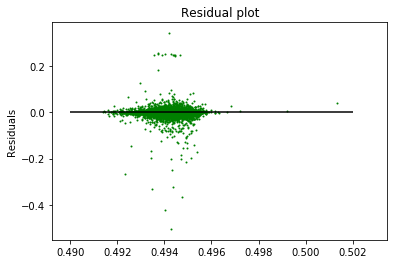

In [115]:
plt.scatter(y_pred_lm1_test, y_pred_lm1_test - y_test_xform, c='g', s=1)
plt.hlines(y=0, xmin=0.49, xmax=0.502)
plt.title("Residual plot")
plt.ylabel('Residuals')



In [107]:
lm2 = LinearRegression()

lm2.fit(X_train, y_train)
print(lm2)

lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.03707968]
[[-1.04239936e-01  4.87219246e-03  3.02658643e-03 -4.45480820e-04
  -7.11543564e-05]]


In [108]:
y_pred_lm2 = lm2.predict(X_train)
y_pred_lm2

array([[1.70844427e-02],
       [8.59214762e-03],
       [1.47480501e-06],
       ...,
       [1.00700812e-02],
       [1.53886533e-02],
       [1.26471874e-02]])

In [109]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('r^2: {:.2%}'.format(r2_lm2))

mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("mse: {:.3}".format(mse_lm2)) 

mae_lm2 = median_absolute_error(y_train, y_pred_lm2)
print("mae: {:.3}".format(mae_lm2)) 


r^2: 0.16%
mse: 0.0179
mae: 0.0276


In [110]:
y_pred_lm2_test = lm1.predict(X_test)
y_pred_lm2_test

array([[0.57164397],
       [0.57538583],
       [0.57145725],
       ...,
       [0.57268202],
       [0.56129907],
       [0.55895344]])

In [111]:
r2_lm2 = r2_score(y_test, y_pred_lm2_test)
print('r^2: {:.2%}'.format(r2_lm2))

mse_lm2 = mean_squared_error(y_test, y_pred_lm2_test)
print("mse: {:.3}".format(mse_lm2)) 

mae_lm2 = median_absolute_error(y_test, y_pred_lm2_test)
print("mae: {:.3}".format(mae_lm2)) 



r^2: -1344.20%
mse: 0.325
mae: 0.557
